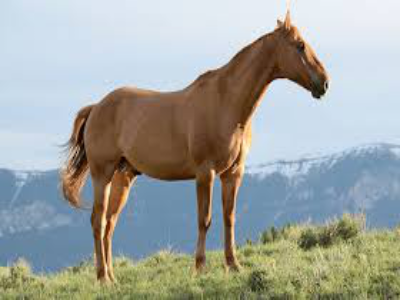

In [20]:
import cv2
import os
import time
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

folder_path = "slideshow_images"
display_time = 1  
transition_frames = 20  

image_files = sorted([f for f in os.listdir(folder_path) if f.endswith((".jfif", ".png"))])
images = []


for file in image_files:
    img = cv2.imread(os.path.join(folder_path, file))
    img = cv2.resize(img, (400, 300)) 
    images.append(img)


for i in range(len(images)):
    current = images[i]
    next_img = images[(i + 1) % len(images)]

   
    rgb = cv2.cvtColor(current, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(rgb))
    time.sleep(display_time)
    clear_output(wait=True)

    for alpha in np.linspace(0, 1, transition_frames):
        blended = cv2.addWeighted(current, 1 - alpha, next_img, alpha, 0)
        rgb_blended = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(rgb_blended))
        time.sleep(0.05)
        clear_output(wait=True)
